In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv(r'C:\Users\user\Downloads\train_loan.csv')

In [3]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
df = df.drop(['Loan_ID','Gender','Married','Dependents'],axis=1)

In [5]:
df.isna().sum()/len(df)*100

Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Education']=le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

In [7]:
df.head()

,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,0,0,6000,0.0,141.0,360.0,1.0,2,1


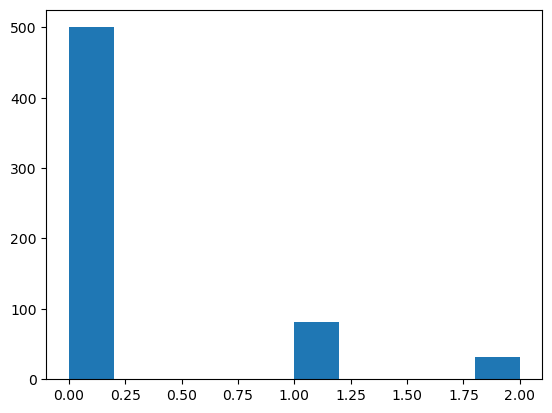

In [8]:
plt.hist(df['Self_Employed'])
plt.show()

In [9]:
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].median())

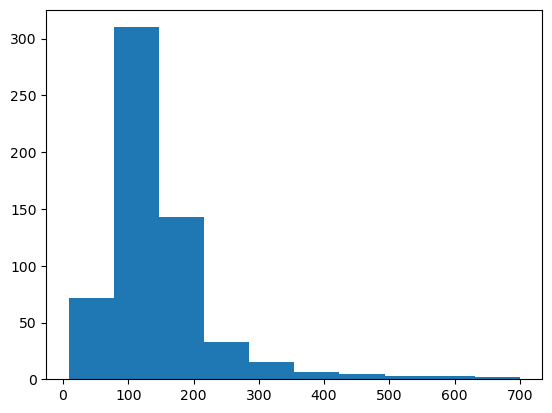

In [10]:
plt.hist(df['LoanAmount'])
plt.show()

In [11]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())

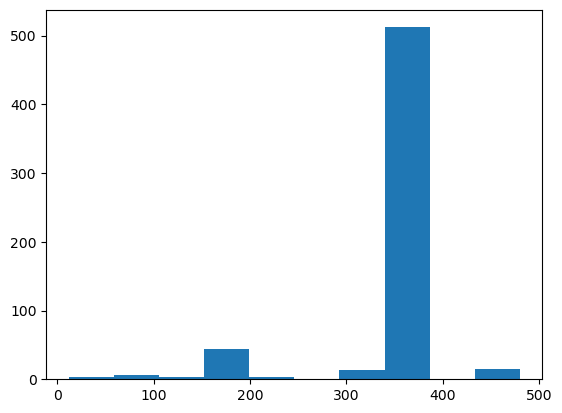

In [12]:
plt.hist(df['Loan_Amount_Term'])
plt.show()

In [13]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

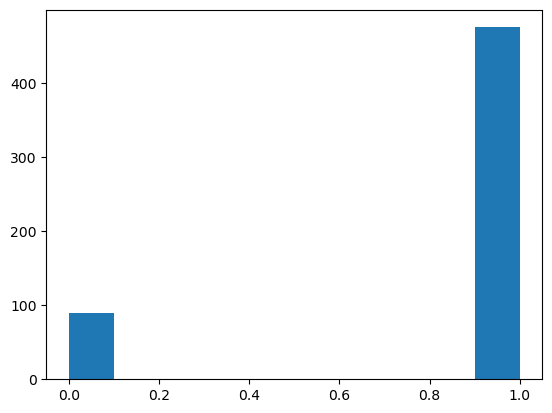

In [14]:
plt.hist(df['Credit_History'])
plt.show()

In [15]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].median())

In [16]:
df.isna().sum()

Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# LogisticRegression

In [19]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()

In [20]:
lr_model.fit(x_train,y_train)

LogisticRegression()

In [21]:
y_pred_lr=lr_model.predict(x_test)

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [23]:
print('accuracy=',accuracy_score(y_test,y_pred_lr))
print('confusion_matrix=\n',confusion_matrix(y_test,y_pred_lr))

accuracy= 0.7886178861788617
confusion_matrix=
 [[18 25]
 [ 1 79]]


# KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier()

In [25]:
metric_k=[]
neighbors=np.arange(3,15)
for n in neighbors:
    clf=KNeighborsClassifier(n_neighbors=n)
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    metric_k.append(acc)

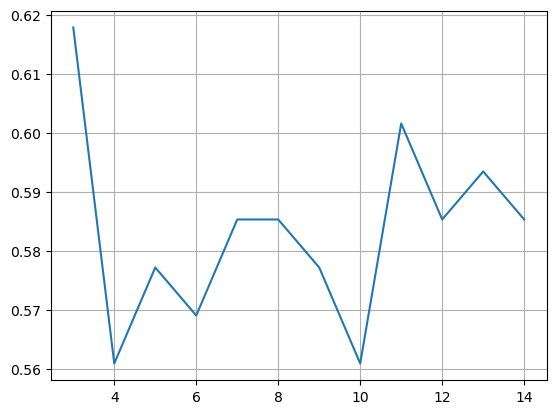

In [26]:
plt.plot(neighbors,metric_k)
plt.grid()

In [27]:
knn_model=KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train,y_train)
y_pred_knn=knn_model.predict(x_test)
print('accuracy=',accuracy_score(y_test,y_pred))
print('confusion matrix=\n',confusion_matrix(y_test,y_pred_knn))

accuracy= 0.5853658536585366
confusion matrix=
 [[11 32]
 [19 61]]


# SVM

In [28]:
from sklearn.svm import SVC
sv=SVC()

In [29]:
sv.fit(x_train,y_train)

SVC()

In [30]:
y_pred_lr=sv.predict(x_test)

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [32]:
print('accuracy=',accuracy_score(y_test,y_pred_lr))
print('confusion_matrix=\n',confusion_matrix(y_test,y_pred_lr))

accuracy= 0.6504065040650406
confusion_matrix=
 [[ 0 43]
 [ 0 80]]


In [33]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [34]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [35]:
y_pred_lr=dt.predict(x_test)

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [37]:
print('accuracy=',accuracy_score(y_test,y_pred_lr))
print('confusion_matrix=\n',confusion_matrix(y_test,y_pred_lr))

accuracy= 0.7154471544715447
confusion_matrix=
 [[24 19]
 [16 64]]


In [38]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
print('accuracy_score=',accuracy_score(y_test,y_pred_rf))
print('confusion_matrix/n',confusion_matrix(y_test,y_pred_rf))


accuracy_score= 0.7560975609756098
confusion_matrix/n [[19 24]
 [ 6 74]]


# Hyperparameter tuning

In [39]:
parameters={'n_estimators':[50,100,150],
            'max_depth':[None,5,10],
            'criterion' : ['gini','entropy']}

In [40]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(rf,parameters,cv=3,scoring='accuracy')

In [41]:
grid_search.fit(x_train,y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [42]:
print('best parameters=',grid_search.best_params_)

best parameters= {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 50}


In [43]:
best_model=grid_search.best_estimator_

In [44]:
y_pred=best_model.predict(x_test)
accuracy_score(y_test,y_pred)

0.7804878048780488

# Randomized search cv

In [45]:
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(
    estimator=rf,
    param_distributions=parameters,
    n_iter=10,
    scoring='accuracy',
    cv=3)
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 5, 10],
                                        'n_estimators': [50, 100, 150]},
                   scoring='accuracy')

In [46]:
best_model=random_search.best_estimator_
y_pred=best_model.predict(x_test)
print('best parameter found:',random_search.best_params_)
print('test accuracy:',accuracy_score(y_test,y_pred))

best parameter found: {'n_estimators': 50, 'max_depth': 5, 'criterion': 'entropy'}
test accuracy: 0.7804878048780488
